In [6]:
import sys
import os

In [7]:
from vdyn.models.longitudinal_1d import Vehicle, accel_brake_run, compute_kpis, to_kmh
import matplotlib.pyplot as plt
import pandas as pd

base = dict(CdA=0.90)
car_no_df = Vehicle(ClA=0.0,dCdA_per_ClA=0.1, **base)
car_hi_df = Vehicle(ClA=2.5,dCdA_per_ClA=0.1, **base)

T0, V0, S0, A0 = accel_brake_run(car_no_df, dt=0.01)
T1, V1, S1, A1 = accel_brake_run(car_hi_df, dt=0.01)

k0 = compute_kpis(T0, V0, S0)
k1 = compute_kpis(T1, V1, S1)
pd.DataFrame([{"setup":"no DF", **k0}, {"setup":"hi DF", **k1}])


,setup,t_0_100_s,t_0_200_s,vmax_kmh,brake_100_0_m
0,no DF,2.426747,6.768205,200.024599,127.384585
1,hi DF,2.329625,7.016957,200.035224,121.697146


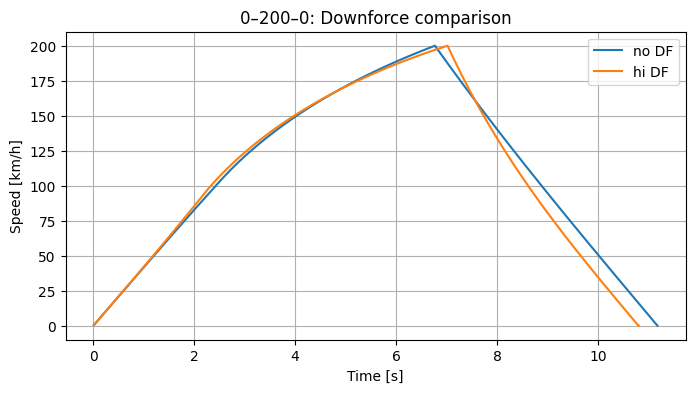

In [9]:
plt.figure(figsize=(8,4))
plt.plot(T0, to_kmh(V0), label="no DF")
plt.plot(T1, to_kmh(V1), label="hi DF")
plt.xlabel("Time [s]")
plt.ylabel("Speed [km/h]")
plt.title("0–200–0: Downforce comparison")
plt.grid(True)
plt.legend();
